In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [6]:
# read the data
df = pd.read_csv(data + 'garments_worker_productivity.csv')
# view the data
df.head(3)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

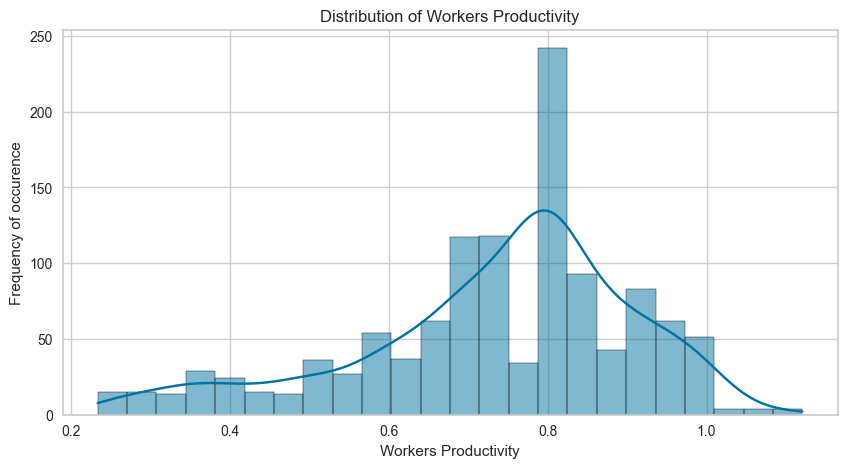

In [9]:
# visualize a distribution of productivity of workers
plt.figure( figsize=(10, 5))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Distribution of Workers Productivity')
plt.ylabel('Frequency of occurence')
plt.xlabel('Workers Productivity')
plt.show()

In [13]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(include='number').nunique()
print(cardinality.sort_values())

no_of_style_change         3
targeted_productivity      9
idle_men                  10
team                      12
idle_time                 12
incentive                 48
no_of_workers             61
smv                       70
over_time                143
wip                      548
actual_productivity      879
dtype: int64


In [14]:
# Assign target to variable
target = 'actual_productivity'

# Identify categorical features
cat_features = ['quarter', 'department', 'day']

# view categorical features
cat_features

['quarter', 'department', 'day']

In [15]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,actual_productivity
2,Target type,Regression
3,Original data shape,"(1197, 15)"
4,Transformed data shape,"(1197, 26)"
5,Transformed train set shape,"(837, 26)"
6,Transformed test set shape,"(360, 26)"
7,Numeric features,10
8,Categorical features,3
9,Rows with missing values,42.3%


In [17]:
# get the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0879,0.0190,0.1363,0.3727,0.0841,0.1604,0.0610
dummy,Dummy Regressor,0.1387,0.0314,0.1765,-0.0154,0.1076,0.2470,0.0380


In [18]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

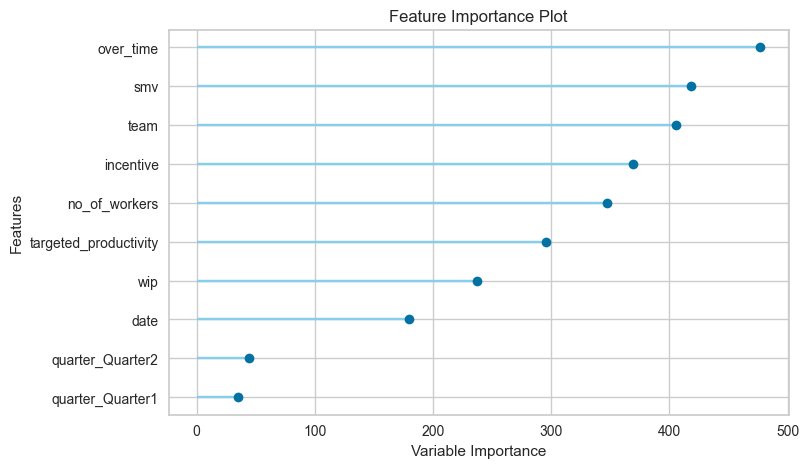

In [19]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [20]:
# save model
save_model(best_model, 'my_employee_productivity_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['team', 'targeted_productivity',
                                              'smv', 'wip', 'over_time',
                                              'incentive', 'idle_time',
                                              'idle_men', 'no_of_style_change',
                                              'no_of_workers'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['quarter', 'department', 'day'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['quarter', 'department', 'day'],
                                     transformer=OneHotEncoder(cols=['quarter',
                                                                     'departm